###01. Dados com muitas dimensões

Objetivo: A partir de uma base de dados com muitas dimensões (exames), que indica se um cancer é maligno ou benigno, queremos tentar reduzir o número de exames para conseguir prever o diagnóstico satisfatoriamente.

In [1]:
import pandas as pd

resultados_exames = pd.read_csv('exames.csv')

resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [2]:
#Ter um valor como base: Realizar um treino com todos os meus dados, para que possamos comparar depois...
#... com a redução de dimensionalidade realizada.

from sklearn.model_selection import train_test_split
from numpy import random #Para setar a aleatoriedade (SEED)

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [3]:
valores_exames

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [4]:
type(valores_exames)

pandas.core.frame.DataFrame

In [5]:
diagnostico

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnostico, Length: 569, dtype: object

In [6]:
type(diagnostico)

pandas.core.series.Series

In [7]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [8]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [9]:
#O próximo passo será criar um modelo de classificação.
#Usaremos o RandomForest (conjunto de árvores de decisão)

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
#'n_estimators' refere-se a quantas árvores de decisão criar no modelo. Default = 100

classificador.fit(treino_x, treino_y)
#E para aplicar o modelo nos dados de teste,usaremos o método score (recebe dados de teste e retorna uma acurácia)
print(classificador.score(teste_x, texte_y))

ValueError: ignored

Como visto, deu erro ao tentar treinar o modelo pois há valores missing. Então, precisamos de tratar: excluir ou completar.

Precisamos então aprender a detectá-los.

In [10]:
#Pandas tem uma função chamada 'isnull()', que retorna True (vazio) ou False (não vazio)
resultados_exames.isnull()


,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
#E como encontrar os valores vazios?
#Quando tenho valor True, python retorna 1
int(True)

1

In [12]:
#E quando tenho valor Fase, retorna 0
int(False)

0

In [13]:
#Então, se eu fizer a soma com a função 'isnull()', terei o número de células vazias por coluna
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [14]:
#Vemos que há 419 células vazias na coluna 'exame_33', que representa quase 74% dos dados:
419/len(resultados_exames)

0.7363796133567663

In [15]:
#E o que posso fazer quando há tantos valores vazios assim?
#Como a maioria da coluna exame_33 é vazia, a melhor solução é remover essa coluna.
#Mas caso tivesse uns 5 valores faltantes (algo como 1% da coluna), poderíamos preencher tais...
#...valores com a média, por exemplo.
#Então vamos excluir a coluna 'exame_33'.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random #Para setar a aleatoriedade (SEED)

SEED = 123143
random.seed(SEED)


valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
#removendo a coluna com valores missing 'exame_33'
valores_exames_v1 = valores_exames.drop(columns=['exame_33'])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
#'n_estimators' refere-se a quantas árvores de decisão criar no modelo. Default = 100

classificador.fit(treino_x, treino_y)
#E para aplicar o modelo nos dados de teste,usaremos o método score (recebe dados de teste e retorna uma acurácia)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))



Resultado da classificação 92.40%


In [16]:
#Aparentemente 92,4% é um valor bom. Mas ainda precisamos verificar se é mesmo bom.
#Preciso então de outro classificador para conseguir comparar com esse resultado.
#Esses 92,4% serão nosso baseline para quando tivermos reduzindo nossa dimensionalidade.
#Mas para reduzir a dimensionalidade sem perder qualidade, preciso saber se este meu...
#...baseline é mesmo um bom resultado.
#Pra isso, preciso conseguir comparar essa classificação com um classificador um pouco mais ingênuo.
#Usaremos o DummyClassifier, usando a estratégia de classificar sempre de acordo com o de maior frequência.

from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)

print("Resultado da classificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba 66.67%


###2. Avançando e explorando dados

In [17]:
#O resultado do classificador bobo foi de 66,67%. Então, se eu fizer um classificador bobo...
#...não chego nem perto dos 92,4%. Então, nosso 92,4% é um classificador interessante, um...
#...bom classificador para ser usado como baseline.
#Então removeremos/selecionaremos features, sem perder a qualidade da classificação.
#E agora que temos o bom baseline de 92,4%, preciso estudar o comportamento das variáveis.
#Temos as classes B (Benigno) e M(Maligno) e precisamos saber, por exemplo...
#quais são os valores do 'exame_1', quando eu caracterizo meu diagnóstico como B ou M
#E estudar o comportamento dos dados é mais fácil com visualização
#E vamos usar o visual do 'seaborn.violinplot'
#No eixo x será o exame e no y será o valor do exame dividido pela classe M e B...
#...e teremos como entender o comportamento, onde está o pico e conseguir estudar...
#...as características de cada exame.

import seaborn as sns

B, exame_1 == valores
M, exame_1 == valores

sns.violinplot(x = "exames", y = "valores", hue = "diagnostico"
               data = dados_plot)


#Mas para gerar as variáveis necessárias ao violinplot, vamos usar a função 'melt' do pandas

SyntaxError: ignored

In [18]:
#Para fazer o 'melt', a 1ª coisa a fazer é juntar os valores_exames com o diagnóstico.
#Posso fazer isso concatenando as colunas

dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot


,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [19]:
#Não é assim que quero, pois preciso criar as colunas 'exames', 'valores' e 'diagnóstico'.

dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name='valores')
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

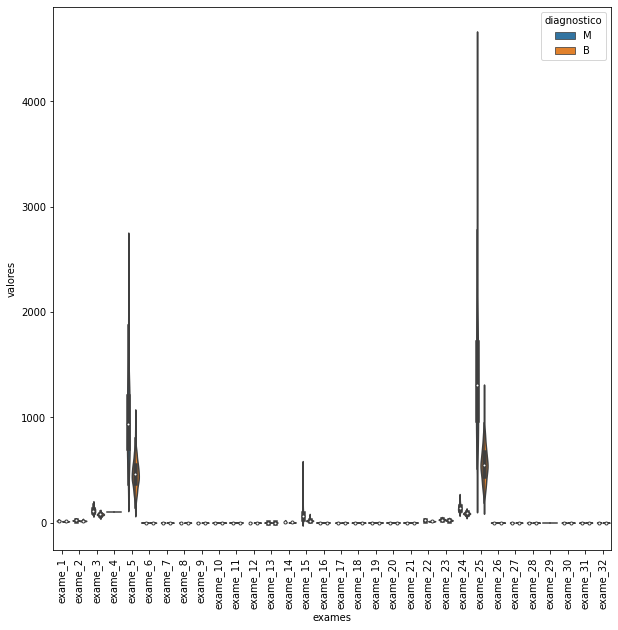

In [20]:
#Com isso, podemos plotar o gráfico.
#O código final fica assim:

import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot)

#Girar a legenda
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

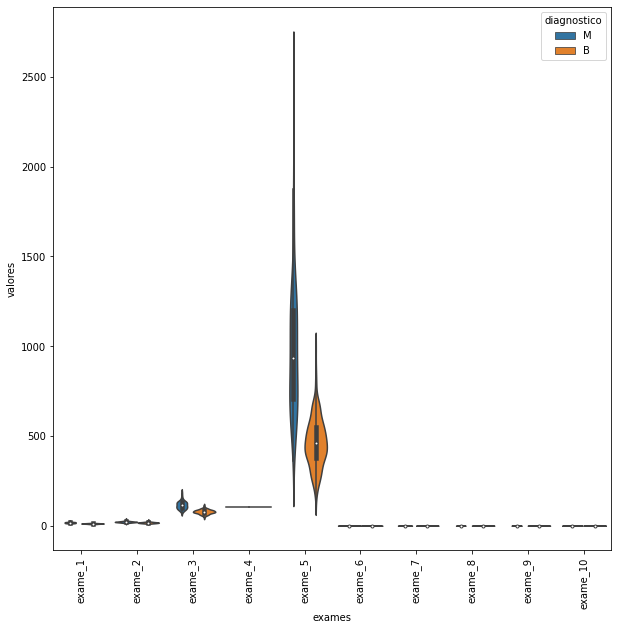

In [21]:
#Como a visualização não ficou muito boa, posso ir concatenando os valores...
#... de 10 em 10.

import seaborn as sns
import matplotlib.pyplot as plt

#Pegando todas as linhas, mas apenas do exame 0 ao 10
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot)

#Girar a legenda
plt.xticks(rotation=90)

In [22]:
#Mesmo assim está ruim. Veja que o dado vai de 0 a 2500, o que atrapalha a visualização.
#De alguma maneira, precisamos colocar esses valores com limite.
#Então vamos ver como padronizar e conseguir analisar a imagem.
#E aí, precisamos padronizar o eixo y para torná-lo 'analisável'.

#Vamos utilizar o StarndardScaler do sklearn, que padroniza os dados...
#... de acordo com a função matemática Z = (x - u)/s

from sklearn.preprocessing import StandardScaler

#Padronizando os dados com StandardScaler
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [23]:
#Note que a saída da padronização é um array numpy.
#E aí não precisamos transformá-lo em um DataFrame para poder passá-lo no..
#..pd.concat na variável 'dados_plot'

from sklearn.preprocessing import StandardScaler

#Padronizando os dados com StandardScaler
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())
valores_exames_v2

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.110223e-16,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.110223e-16,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.110223e-16,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.110223e-16,2.289985,1.919083,2.219635


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

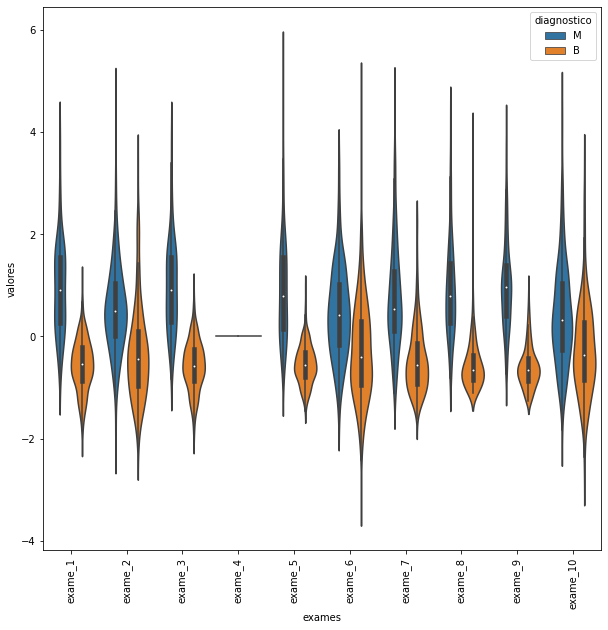

In [24]:
#Então agora vamos passar o 'valores_exames_v2' para o pd.concat

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Padronizando os dados com StandardScaler
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())

#Pegando todas as linhas, mas apenas do exame 0 ao 10
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot)

#Girar a legenda
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

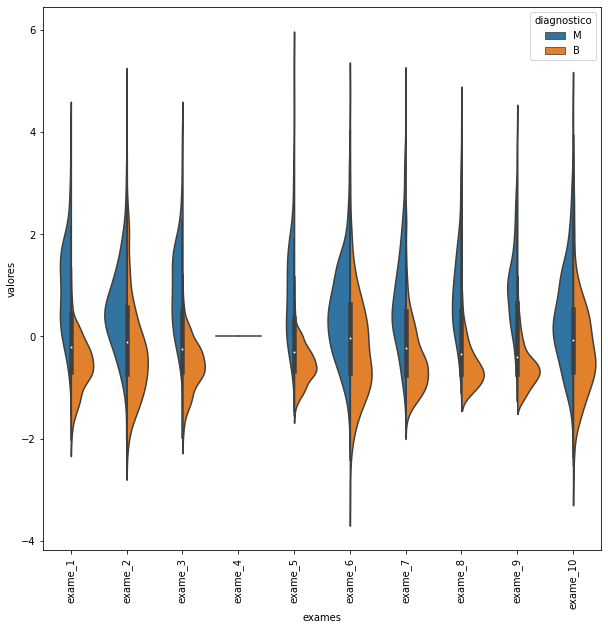

In [25]:
#Mas note que eu quero no gráfico que um lado seja M e o outro B.
#E não está bem assim. Então, preciso passar o parâmetro split no violinplot..
#...para que ele divida o gráfico em 2

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Padronizando os dados com StandardScaler
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())

#Pegando todas as linhas, mas apenas do exame 0 ao 10
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot, split=True) #Split

#Girar a legenda
plt.xticks(rotation=90)





In [26]:
#Na imagem, chama atenção o 'exame_4', que não se modifica.
#Mas estamos analisando as 10 primeiras. Vamos plotar todos os outros dados...
#...e analisar juntos.

#Então, no eixo X tenho os exames...
#...no eixo y os valore normalizados.
#E como podemos interpretar esse gráfico?
#Do lado esquerdo, tenho os cancer do tipo M (Maligno) e...
#... do lado direito, os cancer do tipo B (Benigno).
#O ponto mais alto das 'ondas' (crista), são os valores que mais ocorrem.
#Olhando pro 'exame_2':
#A crista da onda laranja (B) está relativamente distante da crista da onda azul (M).
#Isso quer dizer que esse exame é um bom exame para diferenciar entre M e B.
#Diferente do 'exame_6':
#Na cor laranja (B), temos até 2 ondas(cristas), e no azul (M), temos que seu...
#pico é bem próximo do laranja (B).
#No 'exame_5', tenho uma crista bem alta laranja (B), porém tenho valores melhor...
#...distribuídos pro azul (M).
#O 'exame_4' é o que chama mais atenção, pois é uma reta.
#Se olharmos para o valor ainda desnormalizado, vemos que é um valor constante.
valores_exames_v1.exame_4


0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

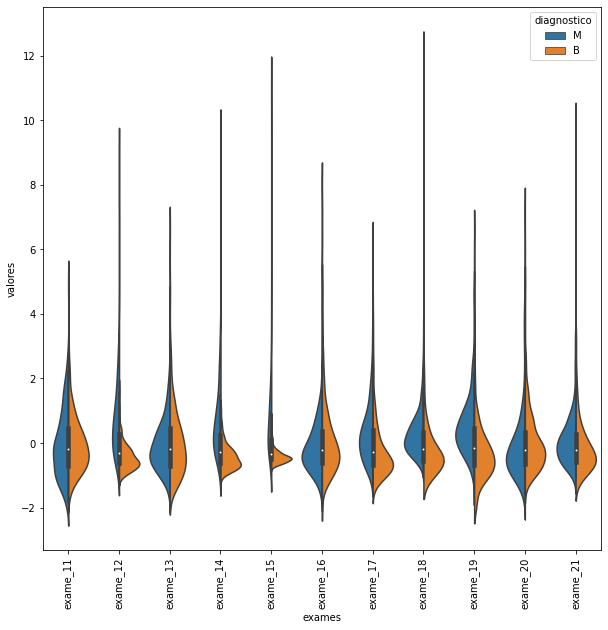

In [27]:
#Logo, a variável 'exame_4' não agrega em nada ao processo de classificação.
#Apenas ocupa espaço desnecessário.
#Então, features de valores constantes podem ser eliminados.
#Mas antes, vamos plotar as demais variáveis para verificar o que podemos eliminar.

#Para plotar os demais gráficos, é mais fácil criarmos uma função

def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames',
                     value_name='valores')

  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot, split=True) #Split

  #Girar a legenda
  plt.xticks(rotation=90)

#Testando a função
grafico_violino(valores_exames_v2,10,21)

In [28]:
#No 'exame_15' já verificamos um pico quando laranja (B)...
#...enquanto no azul (M) o valor é bem distribuído.

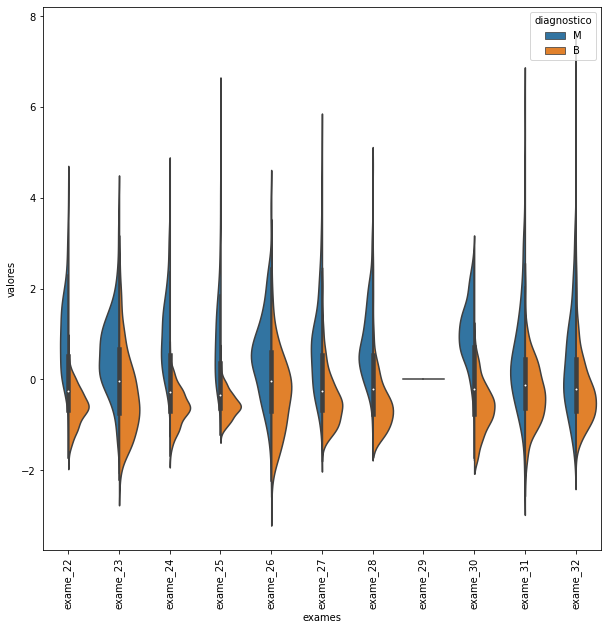

In [29]:
grafico_violino(valores_exames_v2,21,32)

In [30]:
#No 'exame_29' já descobrimos uma variável constante.
#Já podemos retirar as variáveis constantes e verificar se temos...
#uma piora no resultado.

valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

#Criando uma função para classificar
def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)

  classificador = RandomForestClassifier(n_estimators=100)
  #'n_estimators' refere-se a quantas árvores de decisão criar no modelo. Default = 100

  classificador.fit(treino_x, treino_y)
  #E para aplicar o modelo nos dados de teste,usaremos o método score (recebe dados de teste e retorna uma acurácia)
  print("Resultado da classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))


#Aplicando a função nos dados sem as variáveis eliminadas

classificar(valores_exames_v3)


Resultado da classificação 92.98%


In [31]:
#Resultado foi de 92,98%, portanto bem próximo e até ligeiramente superior ao baseline...
#... de 92,4%. Note que não fomos abaixo do baseline, o que é importante.
#Portanto, reduzimos 2 dimensões nos dados sem perda de qualidade na classificação.

###3. Dados correlacionados

Matriz de correlação

In [32]:
#Agora precisamos calcular a correlação.
#As variáveis dos exames estão no dataframa valores_exames_v3.
#E calcular a correlação é simples. A função corr() do pandas retorna a matriz de correlação.
#Essa matriz retorna a correlação entre todas as variáveis.

valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


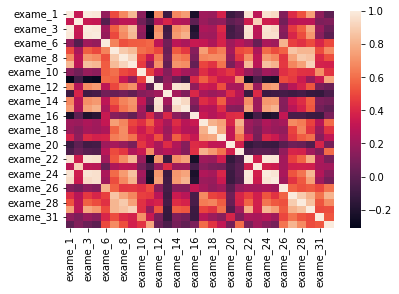

In [33]:
#Mas analisar a correlação na matriz não é agradável.
#Criaremos a visualização heat map do seaborn (mapa de calor)

matriz_correlacao = valores_exames_v3.corr()
sns.heatmap(matriz_correlacao)

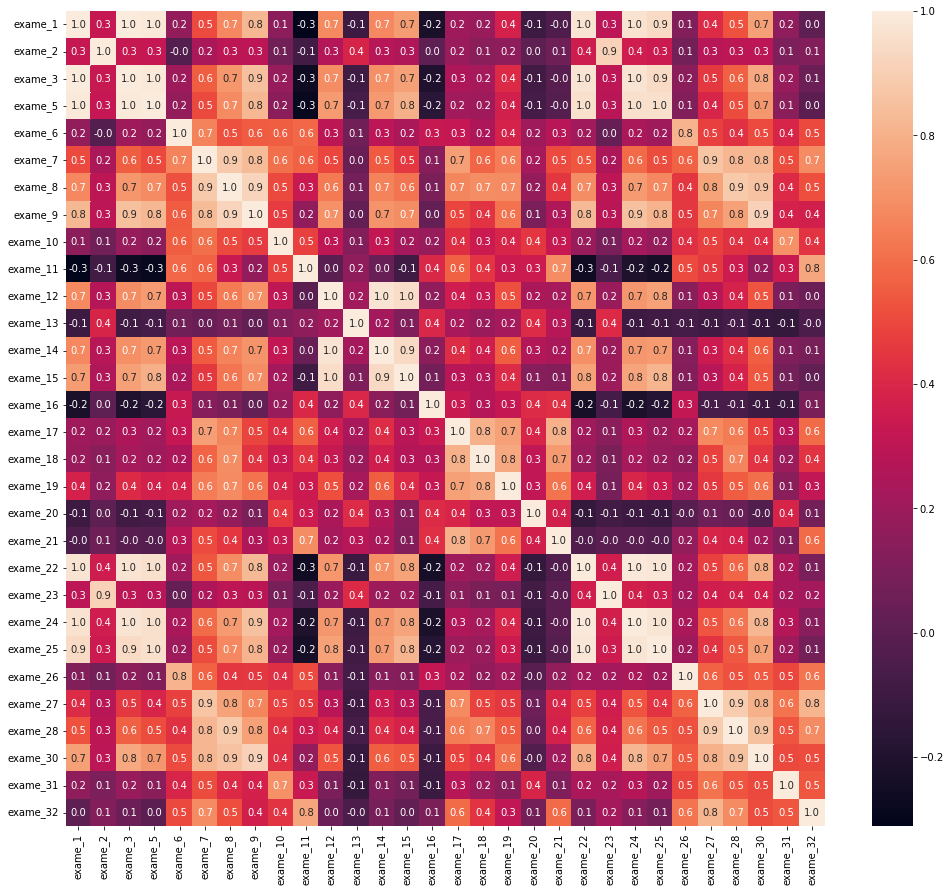

In [34]:
#Não está legal o visual. Vamos melhorar!

plt.figure(figsize=(17, 15)) #aumentando a imagem
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f") #Mostrar o valor das correlações, com 1 casa decimal.

In [35]:
#Interpretando:
#A diagonal principal são os valore totalmente correlacionados (1). É a feature correlacionada com ela mesma. Isso não interessa.
#Há outras features totalmente correlacionadas, e algumas bem próximas de 1 também. Ex.: exame_3 com exame_22.
#E tenho features menos correlacionadas, que são as mais escuras, e estão muito próximas do 0.
#Agora então podemos analisar quais correlações estão muito próximas de 1 e excluir esses exames de nossa base de dados.
#Mas não é tão simples fazer isso olhando pro gráfico. Faremos de forma automatizada.
#Posso pedir para a matriz de correlação retornar as correlações maiores que 0.99, ou seja, o que tem a correlaçaõ quase perfeita.
#Exemplo:

matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

#Note que na matriz filtrada aparecerá apenas os valores que atendem ao critério.

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Agora posso fazer um 'sum()' desses valores vazios
#Fazendo a soma, saberei qual coluna, ou seja, qual variável tenho correlações maiores que 1. alguma coisa...
#Ou seja: Ao printar, verei que terei os exames com no mínimo 1.
#E tudo que estiver acima de 1, significa que é uma variável altamente correlacionada.
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [37]:
type(matriz_correlacao_v2)

pandas.core.series.Series

In [38]:
#E agora posso a Series 'matriz_correlacao_v2' quais são os valores maiores que 1:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

#Com isso, vemos que as variáveis altamente correlacionadas são exames 1, 3, 22 e 24.

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [39]:
type(variaveis_correlacionadas)

pandas.core.series.Series

In [40]:
#Agora então preciso excluir essas variáveis do meu dataset e, na sequencia...
#Medir a acurácia com o novo dataset.

valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [41]:
#Medindo a acurácia com o novo dataset.
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [42]:
#Veja que o resultado foi um pouco inferior ao obtido anteriormente.
#Mas há um detalhe importante:
#Nós descobrimos quais variáveis estavam correlacionadas. Porém, nós excluímos todas elas, quando na verdade...
#..deveríamos ter excluído apenas 1 dessas variáveis correlacionadas, e não o par.
#Então, precisamos voltar na nossa matriz de correlação e verificar quais delas estão correlacionadas entre si.
#Vemos então que 'exame_1' e 'exame_3' estão totalmente correlacionadas. Então, preciso excluir alguma delas.
#Do mesmo modo, o 'exame_22' e 'exame_24' estão totalmente correlacionados. Então, também preciso excluir alguma delas.
#Por critério de simples ordem, vamos deixar o 'exame_1' e o 'exame_22', excluindo o 'exame_3' e 'exame_24'.

valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
valores_exames_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [43]:
#Agora podemos novamente treinar e classificar com a nova base de dados.

classificar(valores_exames_v5)

Resultado da classificação 92.98%


In [44]:
#Agora, o resultado se manteve. Portanto, excluimos mais 2 features sem prejudicar o resultado.
#Isso é muito interessante.
#Essa técnica pode ser aplicada a qualquer base de dados, pois tem caráter de um pré-processamento.
#A partir desse momento, precisaremos de técnicas mais avançadas, onde a exclusão dessas features seja mais automática.
#E é o que veremos na sequencia.

Correlação e Causalidade

In [45]:
#Quando estamos analisando correlações, podemos tirar conclusões que não fazem sentido.
#Então é preciso cuidado!
#A relação entre correlação e causalidade nem sempre são verdadeiras. Variáveis podem ter alta correlação, mas uma não implica...
#...a causalidade da outra.
#Há um site sobre correlações espúrias: https://www.tylervigen.com/spurious-correlations

###4. Automatizando a seleção

In [46]:
#Como vimos, acabamos de excluir as features com alta correlação.
#Será que consigo selecionar as k melhores features? 
#Há alguma função que geraria uma pontuação para cada features (Exame), de modo que...
#...eu consiga selecionar as melhores.
#Sim, há: SelectKbest do sklearn.
#Passaremos uma função que gerará um score para cada feature e passaremos  também...
#...um k, que é o nº de features que queremos que seja selecionado.
from sklearn.feature_selection import SelectKBest
#Uma função muito utilizada é a QUI-QUADRADA, que vai gerar uma pontuação para cada...
#...feature e podemos inferir quais serão as mais representativas pro processo de classificação.
from sklearn.feature_selection import chi2

In [47]:
#Passando a função e o nº de features a selecionar (k)
selecionar_kmelhores = SelectKBest(chi2, k=5) #Das 33 features, vamos escolher 5. Ou seja, a pessoa fará 5 exames.

In [48]:
#Note que ele é uma função que selecionará as 5 melhores features...
#...de acordo com a nossa função de pontuação, que será uma qui-quadrada.
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f1dab926e60>)

In [49]:
#Agora, treinaremos o nosso modelo SelectKbest e depois realizar a transformação nos nossos dados
#Primeiro preciso separar novamente em treino e teste

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5,
                                                        diagnostico,
                                                        test_size=0.3)

#Além disso, preciso ajustar meus dados
selecionar_kmelhores.fit(treino_x, treino_y)

ValueError: ignored

Note que ocorreu um erro dizendo que o input não pode ser negativo.

Ocorre que a qui-quadrada não aceita termos negativos na sua entrada. E se analisarmos os valores_exames_v5, temos vários valores negativos.

In [ ]:
valores_exames_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Então, de alguma maneira precisamos que voltar pros valores ANTES de normalizar, que no caso seria 'valores_exames_v1'

In [50]:
valores_exames_v1

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


Precisaremos então remover tudo o que removemos a posteriori desse tratamento 

In [51]:
#Vamos então dropar o exame_4, exame_29 (valores contínuos) e exame_3 e exame_24 (alta correlação)
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

In [52]:
#Agora, rodarmos novamente com esses novos dados

#Dividindo treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

#Além disso, preciso ajustar meus dados
selecionar_kmelhores.fit(treino_x, treino_y)
#Aplicando a transformação
treino_kbest = selecionar_kmelhores.transform(treino_x) #Essa nova variável será as variáveis de treino selecionadas pelo nosso modelo
teste_kbest = selecionar_kmelhores.transform(teste_x)

#Feito isso, terei então os dados de treino e de teste com 5 features (exames) cada um


In [53]:
#Veja que já foi selecionado.
#Temos os dados de treino com apenas 5 colunas.
treino_kbest.shape

(398, 5)

In [54]:
#Da mesma forma, os dados de teste com 5 colunas
teste_kbest.shape

(171, 5)

In [55]:
#Feito isso, precisamos treinar o nosso modelo com apenas essas 5 features e classificar
#Usaremos o RandomForest

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
#E para aplicar o modelo nos dados de teste,usaremos o método score (recebe dados de teste e retorna uma acurácia)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação 89.47%


In [56]:
#Deu 89,47% de acurácia.
#Mas para fins de comparabilidade, precisamos setar o SEED
SEED = 1234
random.seed(SEED)

#Dividindo treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

#Além disso, preciso ajustar meus dados
selecionar_kmelhores.fit(treino_x, treino_y)
#Aplicando a transformação
treino_kbest = selecionar_kmelhores.transform(treino_x) #Essa nova variável será as variáveis de treino selecionadas pelo nosso modelo
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [57]:
#E agora vamos treinar e classificar novamente

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
#E para aplicar o modelo nos dados de teste,usaremos o método score (recebe dados de teste e retorna uma acurácia)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação 92.40%


In [58]:
#Opa, 92,4% é um resultado interessante.
#O último havia sido de 92,98% excluindo apenas 4 features, ou seja, mantendo 29 features
#Agora estamos com 92,4% excluindo 28 features, ou seja, mantendo apenas 5 features

5/33

0.15151515151515152

In [59]:
#Como estamos com 15% das features originais, diminuimos nosso banco de dados em 85%.
#Levando pro mundo da Alura_care, e supondo que cada exame tem o mesmo custo...
#...temos que reduzimos o custo com exame em 85%.
#Isso parece sucesso...MAS, será que olhar só para acurácia é suficiente???
#Vamos aprender como analisar de outra forma os resultados de classificação. 

Matris de Confusão

In [60]:
#Bom, reduzimos para 5 o nº de features e mantivemos uma acurácia de 92,4%, estando no limiar com nosso baseline.
#MAS, resolvemos muita informação. A questão é:
#Será que estou acertando mais quando o cancer é benigno?
#Ou errando mais quando é do tipo maligno?
#O jeito de analisar isso é por meio de uma matriz de confusão.

from sklearn.metrics import confusion_matrix

#Instanciando a matriz
#Passo como parâmetro o valor real e o valor predito
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))


In [61]:
#Agora temos a matriz de confusão
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(30.5, 0.5, 'real'), Text(0.5, 12.5, 'Predição')]

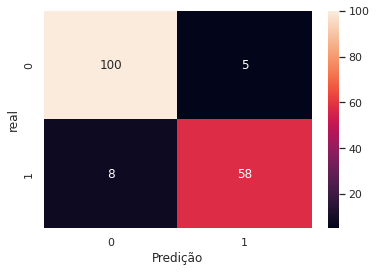

In [62]:
#Interpretando dessa forma não é muito agradável.
#Vamos utilizar um recurso visual para facilitar a análise
sns.set() #Necessária para setar os rótulos dos eixos
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "real") #Mostrar a qtd de predições, com valor inteiro.

[Text(56.5, 0.5, 'real'), Text(0.5, 38.5, 'Predição')]

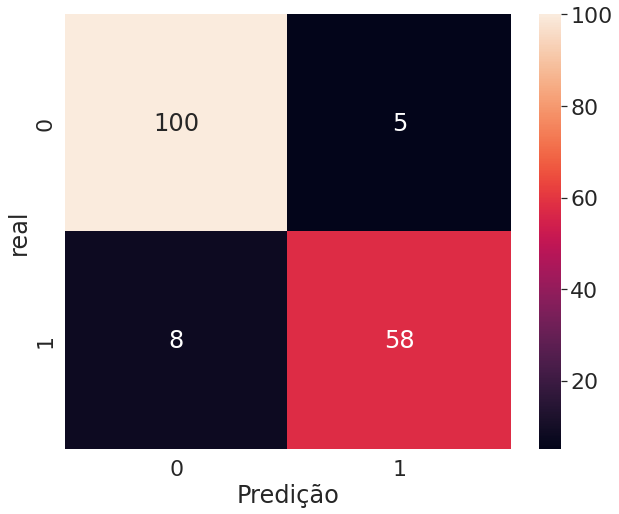

In [63]:
#Para analisar a matriz, vamos configurar um pouco melhor (aumentar)
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2) #Necessária para setar os rótulos dos eixos
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "real") #Mostrar a qtd de predições, com valor inteiro.


In [64]:
#Interpretando a matriz de confusão:

#O eixo Y representa os valores reais
#O eixo X representa os valores preditos
#0 - Cancer benigno
#1 - Cancer maligno

#Quando analiso o 0 na horizontal (valores reais), significa que tenho 105 casos (100 + 5) como cancer benigno
#Quando analiso o 1 na horizontal (valores reais), significa que tenho 66 casos (8 + 58) como cancer maligno

#Então, de 105 casos de cancer benigno, meu modelo acerta corretamente 100
#E de 66 casos de cancer maligno, meu modelo acerta corretamente 58.

#E porque olhar pra isso é importante?
#Em casos como esse que envolve saúde (vida das pessoas), saber se estamos acertando mais de um ou outro é importante.
#Imagina a situação: Você tem uma pessoa que tinha cancer e foi realizar os exames e o diagnóstico foi de que ela não tinha a doença.
#Então, a pessoa não irá se tratar e isso é grave.

Seleção com RFE

Resultado da classificação 92.98%


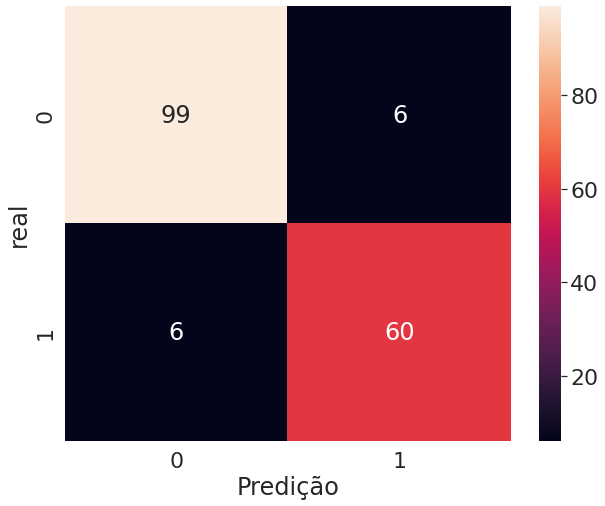

In [65]:
#Aproveitando a ideia do SelectKbest na qual damos uma pontuação para cada feature...
#...vamos aprender uma outra técnica, relativamente semelhante ao SelectKbest.
#Vamos avaliar a classificação por meio da acurácia. E vamos obter qual das features é a mais importante.
#Então, dará uma pontuação para cada feature e, assim, descartamos a de menor pontuação.
#Só que ele não para por aí. Vai começar o processo todo de novo, dando pontuação e eliminando a feature de menor valor...
#...até atingir o nº que estamos pedindo para ele selecionar.
#O nome desse processo é RFE: Recursal Feature Elimination (Eliminação de feature por recursão)

from sklearn.feature_selection import RFE

#Dividindo treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5 , step = 1)
selecionador_rfe.fit(treino_x, treino_y)

#Aplicando o selecionador. A saída será as variáveis de treino e teste
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

#Gerar a classificação, medir a acurácia e plotar a matriz de confusão
classificador.fit(treino_rfe, treino_y)

#Matriz confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2) #Necessária para setar os rótulos dos eixos
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "real") #Mostrar a qtd de predições, com valor inteiro.

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))

In [66]:
#Analisando as 2 matrizes de confusão (atual e anterior), vemso que com o método de feature selection RFE...
#...o classificador acertou um pouco mais no cancer maligno (de 58 para 60), e um pouco menos no benigno (100 para 99).

###5. Visualizando os dados no plano

Resultado da classificação 95.91%


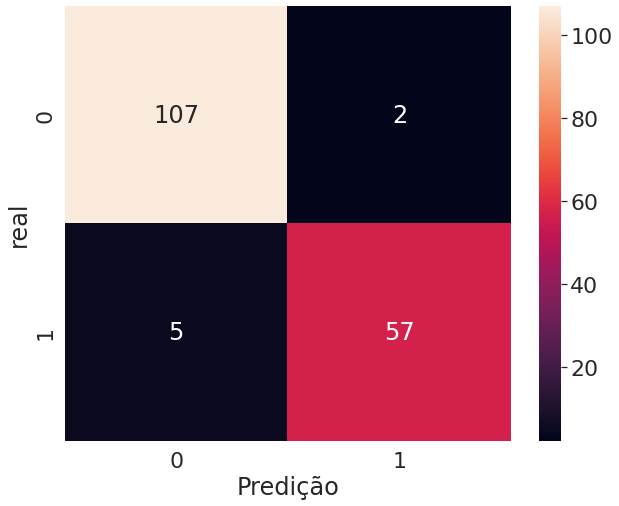

In [67]:
#Até o momento selecionamos algumas features baseadas em algumas visualizações como...
#...violinplot, matriz de correlação e depois aprendemos como selecionar features com...
#...algoritmos mais automatizados, como SelecKbest e RFE.
#Esses algoritmos, dizemos a eles quantas features queremos.
#O ponto agora é: Há alguma técnica que vai me indicar o conjunto de features que vai gerar o melhor resultado?
#Há sim: Trata-se do RFE cross-validation: Pega nosso banco de dados e o divide em blocos.
#Imagina que meu banco de dados foi dividido em 4 blocos. Ele então aplica o RFE em cada um dos blocos.
#Dessa forma, consegue avaliar quantas features preciso para gerar o melhor resultado possível.
#E não só isso: Indica quais features preciso para implementar esse melhor resultado.
#Implementação semelhante a do RFE.


from sklearn.feature_selection import RFECV

#Dividindo treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

#No RFECV, não passo 'n_features_to select', mas o nº de divisões a realizar: CV.
#E também preciso passar uma função de avaliação (métrica a utilizar). Passaremos a acurácia. 
selecionador_rfecv = RFECV(estimator = classificador, cv = 5 , step = 1, scoring = 'accuracy')
selecionador_rfecv.fit(treino_x, treino_y)

#Aplicando o selecionador. A saída será as variáveis de treino e teste
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

#Gerar a classificação, medir a acurácia e plotar a matriz de confusão
classificador.fit(treino_rfecv, treino_y)

#Matriz confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2) #Necessária para setar os rótulos dos eixos
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "real") #Mostrar a qtd de predições, com valor inteiro.

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv, teste_y)*100))

Conseguimos 95,91%, o melhor até o momento.

Comparando esta matriz de confusão com a anterior, vemos qeu ele consegue melhorar quando a pessoa tem câncer benigno.

E quais features o RFECV selecionou?

In [69]:
#Para verificar as features selecionadas pelo RFECV
#Nº de features
selecionador_rfecv.n_features_

19

In [70]:
#E as features podem ser encontradas também
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [72]:
#Retornou um array com True para todas as features selecionadas. 
#Então, basta fazer conforme abaixo
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31'],
      dtype='object')

In [76]:
#Vendo o array do score para todas as features.
#Exemplo: Quando eu seleciono 1 features, a acurácia vai a 91,25%(primeiro item do array)
#E quando seleciono todas, a acurácia vai para 97,47% (último item do array)

selecionador_rfecv.grid_scores_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.9125    , 0.8875    , 0.875     , 0.81012658, 0.83544304],
       [0.925     , 0.9625    , 0.9       , 0.91139241, 0.92405063],
       [0.9375    , 0.9125    , 0.9375    , 0.92405063, 0.92405063],
       [0.9375    , 0.95      , 0.95      , 0.89873418, 0.96202532],
       [0.95      , 0.95      , 0.9375    , 0.91139241, 0.93670886],
       [0.9375    , 0.95      , 0.925     , 0.92405063, 0.96202532],
       [0.95      , 0.95      , 0.925     , 0.92405063, 0.93670886],
       [0.95      , 0.95      , 0.9375    , 0.93670886, 0.92405063],
       [0.95      , 0.95      , 0.9375    , 0.92405063, 0.93670886],
       [0.95      , 0.95      , 0.9375    , 0.93670886, 0.96202532],
       [0.95      , 0.9625    , 0.9375    , 0.93670886, 0.96202532],
       [0.95      , 0.9625    , 0.95      , 0.94936709, 0.94936709],
       [0.95      , 0.95      , 0.9375    , 0.94936709, 0.96202532],
       [0.9375    , 0.9625    , 0.925     , 0.94936709, 0.97468354],
       [0.95      , 0.9625    , 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


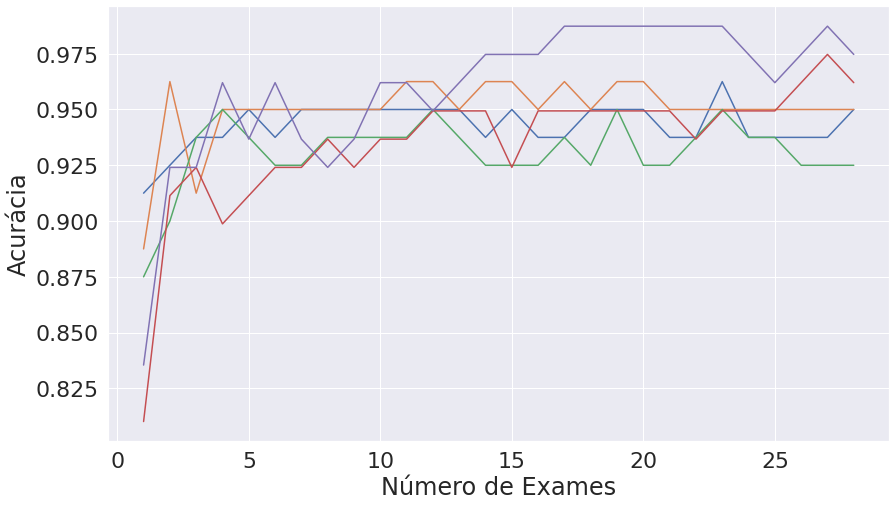

In [81]:
#Porque o RFECV escolheu essas 19 features?
#Vamos plotar uma visualização
import matplotlib.pyplot as plt

#Setar a figura
plt.figure(figsize = (14,8))
#Setar as labels
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")
#Colocar os quadradrinhos (grid)
#plt.grid()
#Plotar o gráfico
#Quero que o eixo x vá de 1 até o tamanho do array das acurácias + 1 (pois quero que último ponto não seja meu último dado. Plotar um pouco mais pra frente)
#E o eixo y, quero que seja meu array/vetor das acurácias
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
#Gerar a imagem
plt.show()

Analisando o gráfico: Verifica-se que o pico é maior que o valor da acurácia que obtivemos ao treinar: 95,91%.

Motivo: Esses valores do gráfico são uma média de cada divisão do banco de dados. Então não serão exatamente os valores a serem obtidos no treino do classificador. De todo modo, indica pra gente a melhor configuração possível.

Todos os métodos que usamos até o momento (SelectKbest, RFE e RFECV) fizeram uma espécie de filtro ou seleção. O nome desses métodos são FEATURE SELECTION.

Será que há outro tipo de método que não se encaixe nessa configuração do FEATURE SELECTION?

Visualizando os dados no plano

In [82]:
#Agora quero visualizar cada linha da base de dados num plano
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


Resultado da classificação 87.72%


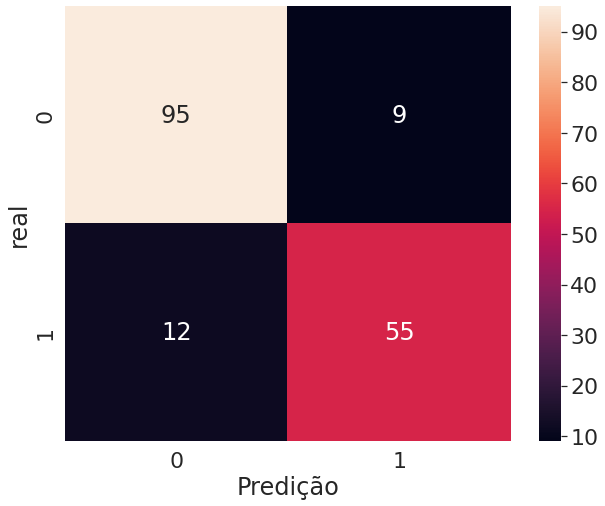

In [83]:
#Quero visualizar, como num gráfico de dispersão, e comparar tipos de cancer maligno e benigno
#Posso pegar um dos métodos de selecionar features e posso modificar, por exemplo, o nº de dimensões para 2 no RFE...
#...e conseguirei plotar num plano.

from sklearn.feature_selection import RFE

#Dividindo treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2 , step = 1)
selecionador_rfe.fit(treino_x, treino_y)

#Aplicando o selecionador. A saída será as variáveis de treino e teste
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

#Gerar a classificação, medir a acurácia e plotar a matriz de confusão
classificador.fit(treino_rfe, treino_y)

#Matriz confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2) #Necessária para setar os rótulos dos eixos
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "real") #Mostrar a qtd de predições, com valor inteiro.

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))

In [84]:
#E agora, para realizarmos a transformação em nossos dados, utilizaremos o selecionador_rfe.transform
#Com isso, transformaremos toda nossa base de dados
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [85]:
#E agora tenho minha base de dados reduzida a 2 dimensões. 
#E é o que preciso para gerar a visualização
valores_exames_v7.shape

(569, 2)

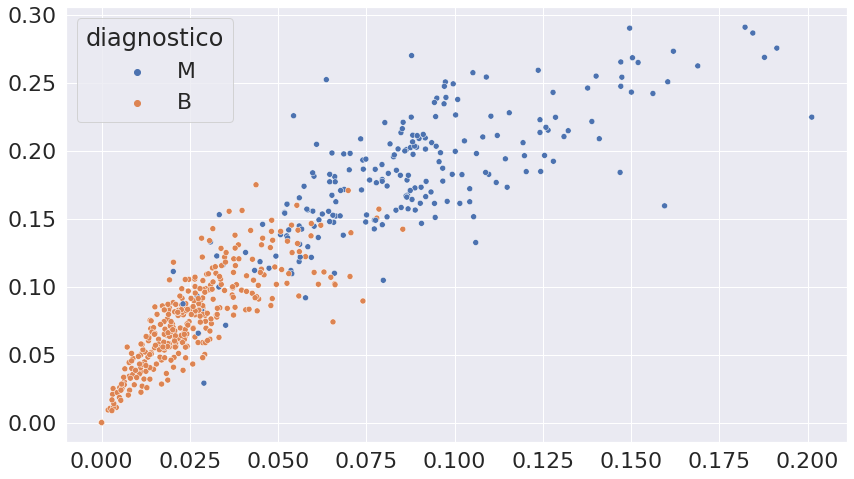

In [86]:
import seaborn as sns

#setar o tamanho da imagem
plt.figure(figsize=(14,8))
#eixo x será a 1º coluna do array (pego todas as linhas de valores_exames_v7 e a primeira coluna)
#eixo y será a 2º coluna do array (pego todas as linhas de valores_exames_v7 e a segunda coluna)
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

Temos então a distribuição dos nossos pontos.

Eu tinha 28 dimensões em valores_exames_v6, e para o gráfico, reduzi para 2 dimensões em valores_exames_v7.

Não estou perdendo muita informação?

Sim estão, no caso de visualizações, selecionar apenas 2 features não é o mais adequado. De alguma maneira, preciso preservar as principais características que vão diferenciar o tipo de câncer entre benigno e maligno.

PCA e TSNE

Uma das técnicas que podemos utilizar para manter o máximo de informação possível com uma dimensionalidade reduzida é o PCA.

O PCA, basicamente, pega nossos dados e faz uma transformação matemática, na qual as primeiras dimensões serão as variáveis que manterão o maior nº possível de informação dos nossos dados.

Vamos aplicar e verificar a visualização, já que visualização por meio do feature selection não pareceu uma ótima solução

In [88]:
from sklearn.decomposition import PCA

#Instanciando o PCA
#O parâmetro 'n_components' é o nº de variáveis que quero como retorno
pca = PCA(n_components = 2)

#Realizar a transformação nos dados
valores_exames_v8 = pca.fit_transform(valores_exames_v6) #esse é o último dataframe sem a transformação

In [89]:
#Obtivemos então o conjuntos dos dados reduzidos a 2 dimensões
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

In [90]:
type(valores_exames_v8)

numpy.ndarray

In [91]:
valores_exames_v8.shape

(569, 2)

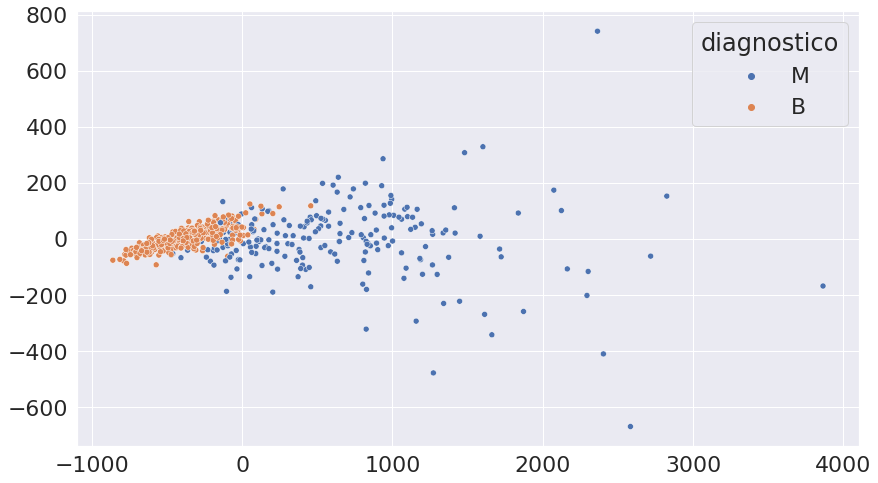

In [92]:
#Agora vamos plotar o scatterplot

#setar o tamanho da imagem
plt.figure(figsize=(14,8))
#eixo x será a 1º coluna do array (pego todas as linhas de valores_exames_v8 e a primeira coluna)
#eixo y será a 2º coluna do array (pego todas as linhas de valores_exames_v8 e a segunda coluna)
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v[:,1], hue = diagnostico)

O PCA realizou a transformação mas, de certo modo, ainda não ficou tão bacana de visualizar quando queremos olhar em detalhes.

A base utilizada está sem a realização de uma padronização (valores_exames_v6). Mas a base 'valores_exames_v5' está com os dados padronizados.

O PCA se comportará melhor com os dados padronizados.

In [93]:
#Aplicando o PCA nos dados padronizados (valores_exames_v5)
#E a visualização ficará um pouco melhor

#Instanciando o PCA
#O parâmetro 'n_components' é o nº de variáveis que quero como retorno
pca = PCA(n_components = 2)

#Realizar a transformação nos dados
valores_exames_v8 = pca.fit_transform(valores_exames_v5) #esse é o último dataframe sem a transformação

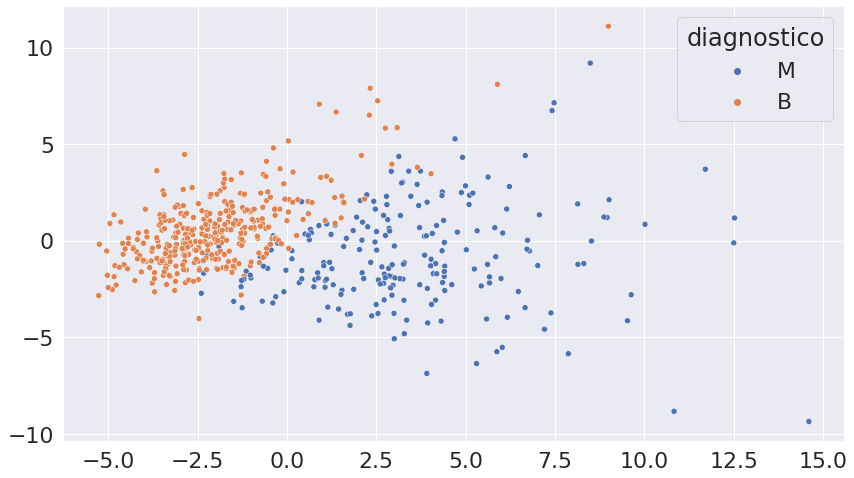

In [95]:
#Agora vamos plotar o scatterplot

#setar o tamanho da imagem
plt.figure(figsize=(14,8))
#eixo x será a 1º coluna do array (pego todas as linhas de valores_exames_v8 e a primeira coluna)
#eixo y será a 2º coluna do array (pego todas as linhas de valores_exames_v8 e a segunda coluna)
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

Agora consigo visualizar onde estãos pontos com maiores confusões... consigo traçar, por exemplo, uma linha que dividirá o tipo de cancer maligno e benigno.

Mas ainda assim, temos uma técnica melhor quando queremos gerar uma visualização.

Trata-se da TSNE: De modo resumido, ela tenta manter as distâncias entre os pontos.
Exemplo: Se eu tentar calcular a distancia entre a linha 0 e a linha 1 nesses dados com 28 dimensões, ele gerará um valor com 28 dimensões.

Isso é bem abstrato... o que ele tenta fazer é pegar essas distancias em altas dimensões, e manter a proporção dessas distâncias também em 2 dimensões. 

E aí conseguimos ter uma noção do quão distante um ponto está do outro.

Vamos aplicar o TSNE.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


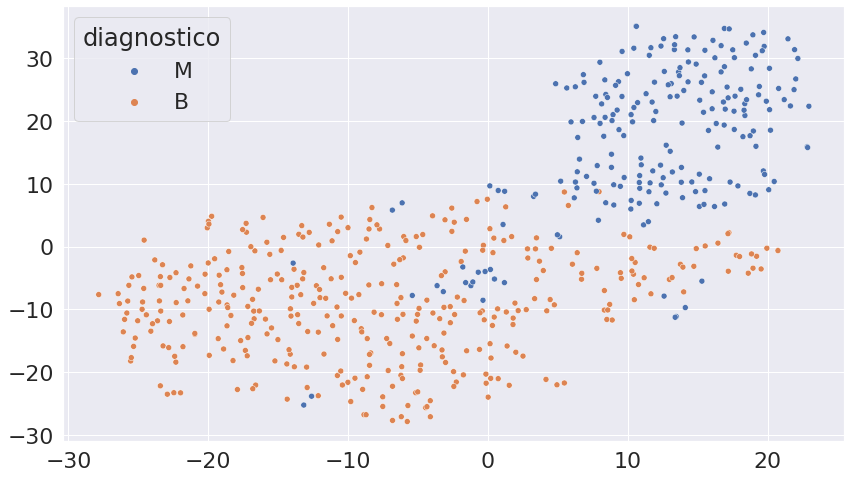

In [96]:
from sklearn.manifold import TSNE
#OBS.: Tem um custo computacional mais alto que o PCA

#Instanciando o TSNE
#O parâmetro 'n_components' é o nº de variáveis que quero como retorno
tsne = TSNE(n_components = 2)

#Realizar a transformação nos dados
valores_exames_v9 = tsne.fit_transform(valores_exames_v5) #com os valores normalizados se comportará melhor

#Agora vamos plotar o scatterplot
#setar o tamanho da imagem
plt.figure(figsize=(14,8))
#eixo x será a 1º coluna do array (pego todas as linhas de valores_exames_v9 e a primeira coluna)
#eixo y será a 2º coluna do array (pego todas as linhas de valores_exames_v9 e a segunda coluna)
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)

Ao compararmos essa visualização do TSNE com a primeira, conseguimos perceber que esta é bem melhor. Fica mais evidente a separação dos dados no espaço, tornando mais clara a fronteira entre câncer maligno e benigno.

Esses modelos que utilizam transformações matemáticas nos dados para depois aplicar a redução de dimensionalidade, são chamados de redução de dimensionalidade.

A diferença entre 'feature selection' e redução de dimensionalidade, é que 'feature selection' funcionará como um filtro, como um funil, ou seja, pegará da nossa base de dados as principais features.

Já a redução de dimensionalidade pegará nossa base de dados, realizará uma transformação e aí sim selecionar as features a manter. E aí sim reduzir a dimensionalidade.